In [2]:
import configparser
import tweepy

from T_config import *

import requests
import json
import pandas as pd


import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import string

import csv

import spacy
from scipy import spatial
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jalisaabeid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jalisaabeid/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
nlp = spacy.load('en_core_web_lg')

In [4]:
#Authentication
auth = tweepy.OAuthHandler(app_key,app_secret)
auth.set_access_token(oauth_token,oauth_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [11]:
with open('Tinder_1') as file:
    f = json.load(file)

ts = pd.DataFrame.from_dict(f["data"])
ts

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities
0,Tue May 02 17:13:43 +0000 2023,1653447688052932613,1653447688052932613,RT @Dreadful4Tymes: I hate how y’all get in re...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,854,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue May 02 17:13:38 +0000 2023,1653447669153398810,1653447669153398810,RT @Dreadful4Tymes: I hate how y’all get in re...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,854,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Tue May 02 17:13:38 +0000 2023,1653447667219824643,1653447667219824643,RT @Dreadful4Tymes: I hate how y’all get in re...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,854,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Tue May 02 17:13:32 +0000 2023,1653447641898860544,1653447641898860544,RT @nexta_tv: #Tinder leaves #Russia on June 3...,False,"[0, 140]","{'hashtags': [{'text': 'Tinder', 'indices': [1...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,64,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Tue May 02 17:13:30 +0000 2023,1653447633850048513,1653447633850048513,RT @Dreadful4Tymes: I hate how y’all get in re...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,854,0,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Tue May 02 16:55:23 +0000 2023,1653443077237768206,1653443077237768206,RT @Dreadful4Tymes: I hate how y’all get in re...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,854,0,False,False,en,NaN,NaN,NaN,NaN,NaN
94,Tue May 02 16:55:13 +0000 2023,1653443034703446016,1653443034703446016,RT @Dreadful4Tymes: I hate how y’all get in re...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,854,0,False,False,en,NaN,NaN,NaN,NaN,NaN
95,Tue May 02 16:55:10 +0000 2023,1653443020820234240,1653443020820234240,RT @Dreadful4Tymes: I hate how y’all get in re...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,854,0,False,False,en,NaN,NaN,NaN,NaN,NaN
96,Tue May 02 16:55:01 +0000 2023,1653442983025430531,1653442983025430531,@GIJaneGaming Lol I don't miss the tinder days...,False,"[14, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.653443e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN


In [216]:
#WITHOUT RETWEET
#-filter:retweets
public_tweets = api.search_tweets(count=100,q= "finding love-filter:retweets",tweet_mode="extended",lang = "en")

#Convert to JSON
json_data = [r._json for r in public_tweets]
df = pd.json_normalize(json_data)
    
    
with open('Dating_2_wo_retweets', 'w') as outfile:
    tweets_json = {"data": json_data}
    json.dump(tweets_json, outfile)

In [217]:
with open('Dating_2_wo_retweets') as file:
    q = json.load(file)
    
re_dr = pd.DataFrame.from_dict(q["data"])

In [218]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [219]:
re_dr['full_text'] = re_dr['full_text'].apply(remove_emojis)

In [220]:
#Tokenise data :: split words 
re_dr['tokens'] = re_dr['full_text'].apply(TweetTokenizer().tokenize)

In [221]:
#remove stop words
stopwords_vocabulary = stopwords.words('english')

re_dr['stopwords'] = re_dr['tokens'].apply(lambda x: [i for i in x if i.lower() not in stopwords_vocabulary])

In [222]:
#remove punctuation 
punctuations = list(string.punctuation)
re_dr['punctuation'] = re_dr['stopwords'].apply(lambda x: [i for i in x if i not in punctuations])

In [223]:
re_dr['final'] = re_dr['punctuation'].apply(lambda x: [i for i in x if len(i) > 1])

In [224]:
sentiment = SentimentIntensityAnalyzer()
re_dr['sentiment'] = re_dr['final'].apply(lambda x: sentiment.polarity_scores(' '.join(x))['compound'])

In [225]:
re_dr

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities,tokens,stopwords,punctuation,final,sentiment
0,Tue Jun 20 22:16:27 +0000 2023,1671280881997152256,1671280881997152256,So I am kinda in a transitional period. I feel...,False,"[0, 275]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,"[So, I, am, kinda, in, a, transitional, period...","[kinda, transitional, period, ., feel, finding...","[kinda, transitional, period, feel, finding, g...","[kinda, transitional, period, feel, finding, g...",0.9274
1,Tue Jun 20 22:16:14 +0000 2023,1671280824380190720,1671280824380190720,"@aaron_renn Absolutely love my home church, bu...",False,"[12, 282]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.671147e+18,...,NaN,NaN,NaN,NaN,NaN,"[@aaron_renn, Absolutely, love, my, home, chur...","[@aaron_renn, Absolutely, love, home, church, ...","[@aaron_renn, Absolutely, love, home, church, ...","[@aaron_renn, Absolutely, love, home, church, ...",0.3804
2,Tue Jun 20 22:15:56 +0000 2023,1671280750820245505,1671280750820245505,So beautiful. Finding love and being loved is ...,False,"[0, 76]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.670942e+18,1670941776427843584,{'created_at': 'Mon Jun 19 23:48:58 +0000 2023...,False,NaN,"[So, beautiful, ., Finding, love, and, being, ...","[beautiful, ., Finding, love, loved, beautiful...","[beautiful, Finding, love, loved, beautiful, t...","[beautiful, Finding, love, loved, beautiful, t...",0.9509
3,Tue Jun 20 22:15:44 +0000 2023,1671280700929060870,1671280700929060870,@brianjoralvarez He needs a whole borat style ...,False,"[17, 263]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.668690e+18,...,NaN,NaN,NaN,NaN,NaN,"[@brianjoralvarez, He, needs, a, whole, borat,...","[@brianjoralvarez, needs, whole, borat, style,...","[@brianjoralvarez, needs, whole, borat, style,...","[@brianjoralvarez, needs, whole, borat, style,...",0.7003
4,Tue Jun 20 22:15:36 +0000 2023,1671280667643064320,1671280667643064320,You don't find love in two weeks but Productio...,False,"[0, 198]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.671278e+18,1671278055753494534,{'created_at': 'Tue Jun 20 22:05:13 +0000 2023...,False,NaN,"[You, don't, find, love, in, two, weeks, but, ...","[find, love, two, weeks, Production, asked, an...","[find, love, two, weeks, Production, asked, an...","[find, love, two, weeks, Production, asked, an...",0.8834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tue Jun 20 20:42:06 +0000 2023,1671257136305946624,1671257136305946624,Finding your person is so lit. Love you @freed...,False,"[0, 53]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,"[Finding, your, person, is, so, lit, ., Love, ...","[Finding, person, lit, ., Love, @freedskii]","[Finding, person, lit, Love, @freedskii]","[Finding, person, lit, Love, @freedskii]",0.6369
96,Tue Jun 20 20:37:05 +0000 2023,1671255873359052801,1671255873359052801,@RyanRicheyTX My husband has been finding some...,False,"[14, 205]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/

In [226]:
re_dr["full_text"]

0     So I am kinda in a transitional period. I feel...
1     @aaron_renn Absolutely love my home church, bu...
2     So beautiful. Finding love and being loved is ...
3     @brianjoralvarez He needs a whole borat style ...
4     You don't find love in two weeks but Productio...
                            ...                        
95    Finding your person is so lit. Love you @freed...
96    @RyanRicheyTX My husband has been finding some...
97    Top 10 Ranked (In my book)\nWhite Men Can't Ju...
98    @__Mars_Arts__ @AkaneTsunemor18 Oh by all mean...
99    @singerboy72 @_Transfusion_ @KellyKellyTV Casi...
Name: full_text, Length: 100, dtype: object

In [227]:
feelings =[]
for i in re_dr["sentiment"]:
    feelings.append(i)

In [228]:
pos = len(re_dr[re_dr.sentiment > 0])
neg = len(re_dr[re_dr.sentiment < 0])
neu = len(re_dr[re_dr.sentiment == 0])

print(pos, neg, neu)

93 7 0


In [23]:
#find average of numbers 
import statistics
statistics.mean(feelings)

0.2537438775510204

In [17]:
places = api.search_geo(query="London", granularity="city")
for place in places:    
    pass
public_tweets = api.search_tweets(count=100,q="dating -filter:retweets",tweet_mode="extended",lang = "en")

#Convert to JSON
json_data = [r._json for r in public_tweets]
df = pd.json_normalize(json_data)
    
    
with open('dating', 'w') as outfile:
    tweets_json = {"data": json_data}
    json.dump(tweets_json, outfile)

In [21]:
with open('Dating_apps_2_wo_retweets') as file:
    q = json.load(file)
    
ts = pd.DataFrame.from_dict(q["data"])

In [22]:
ts

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities
0,Tue Jun 20 22:00:42 +0000 2023,1671276918123929603,1671276918123929603,Ontario:\n\nPlease ensure your female friends ...,False,"[0, 202]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.671006e+18,1671006345049387009,{'created_at': 'Tue Jun 20 04:05:33 +0000 2023...,0,0,False,False,False,en,NaN
1,Tue Jun 20 22:00:42 +0000 2023,1671276916442030083,1671276916442030083,"In June, there is an uptick in romance scams o...",False,"[0, 180]","{'hashtags': [{'text': 'PrideMonth', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,NaN,NaN,NaN,0,0,False,False,False,en,NaN
2,Tue Jun 20 21:55:19 +0000 2023,1671275560616730626,1671275560616730626,I've blocked so many ads for normal products n...,False,"[0, 167]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,0,0,False,False,False,en,"{'media': [{'id': 1671275558393778176, 'id_str..."
3,Tue Jun 20 21:54:46 +0000 2023,1671275422573527043,1671275422573527043,Me: I kinda feel like dating again.\nThe thoug...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,0,0,False,False,False,en,"{'media': [{'id': 1671275406538817540, 'id_str..."
4,Tue Jun 20 21:50:55 +0000 2023,1671274456290045952,1671274456290045952,Maybe this is really mean but all these apps f...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.671257e+18,1671257100134273025,{'created_at': 'Tue Jun 20 20:41:57 +0000 2023...,0,3,False,False,False,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Tue Jun 20 19:20:07 +0000 2023,1671236503270195201,1671236503270195201,I hate dating apps. The mass majority are bots...,False,"[0, 278]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,0,0,False,False,False,en,"{'media': [{'id': 1671236501227843584, 'id_str..."
89,Tue Jun 20 19:18:40 +0000 2023,1671236140441927681,1671236140441927681,i swipe right for more guys on twitter than i ...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,0,0,False,False,NaN,en,NaN
90,Tue Jun 20 19:16:58 +0000 2023,1671235710865555458,1671235710865555458,@PBnJussy Nah this was a general comment based...,False,"[10, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.671232e+18,...,NaN,NaN,NaN,0,2,False,False,NaN,en,NaN
91,Tue Jun 20 19:11:26 +0000 2023,1671234320399314949,1671234320399314949,@BreBrat9 lol might as well. I’m staying off d...,False,"[10, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.671230e+18,...,NaN,NaN,NaN,0,1,False,False,NaN,en,NaN


In [27]:
######################################################################
#W6

In [28]:
from collections import Counter
import pandas as pd
import nltk

top_N = 50

ts = pd.DataFrame.from_dict(q["data"])
punctuations = list(string.punctuation)


stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

# replace '|'-->' ' and drop all stopwords
words = (ts.full_text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)



            Frequency
Word                 
talking           103
stage              82
’                  39
'                  24
.                  19
like               13
stage.              8
,                   8
someone             7
&amp;               7
know                7
got                 7
stage,              7
one                 6
2                   6
never               5
making              5
always              5
still               5
even                5
!                   4
"                   4
played              4
get                 4
real                4
man                 4
make                4
joe                 4
said                4
getting             4
failed              4
lol                 3
moment              3
say                 3
girl                3
-                   3
talk                3
completely          3
super               3
fuck                3
way                 3
current             3
men                 3
?         

In [29]:
#GET TWEET REPLIES TO CERTAIN TWEET FROM CERTAIN USER 
#There is a workaround using the REST API.

#You will need the id_str and @username of the author of the original 
#tweet you want to find replies to.

#You should use the Search API for the "@username" of the author.
#look for the 'in_reply_to_status_id' field to compare to 
#the id_str of the specific tweet you want replies for.

In [30]:
def get_tweet_thread(username,tweet_id):
    #public_tweets = api.search_tweets
    places = api.search_geo(query="London", granularity="city")
    for place in places:    
        pass
    replies = api.search_tweets(q="place:%s" % place.id and 'to:{}'.format(username),since_id=tweet_id, tweet_mode='extended',lang = "en",count=400)

    replied_thread = list()
    for reply in replies:
        if(reply._json['in_reply_to_status_id'] == tweet_id):
             replied_thread.append(reply._json['full_text'])
        
    return(replied_thread)

In [120]:
 get_tweet_thread("@evildunkin",1657167279375921152)

["@evildunkin Friendships and relationships should be a source of support, positivity, and happiness. If you find that a friendship or relationship is consistently draining you, whether it's emotionally or physically, it may be time to reevaluate that connection.\n\nIt's important to have… https://t.co/qAxbrc7fMV",
 '@evildunkin but what if i just have a very very low social battery:(',
 '@evildunkin right',
 '@evildunkin Had to learn this the hard way even if you love em smh.. n i still miss em FML',
 '@evildunkin If it’s exhausting cut it out of your life for peace.',
 '@evildunkin My friends lately haven’t been friending like they used to',
 '@evildunkin Yass if anything it should be energising you.!',
 '@evildunkin How much I want my brain to understand this shit&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;',
 '@evildunkin Is it real? Having a relationship where you are not drained?',
 '@evildunkin Yes!! I need to stop giving mode than I get so much sooner than I do.',
 '@evildunkin Im sad Ive 

In [130]:
get_tweet_thread("@_shwabade_",1656647781644226562)

['@_shwabade_ That’s exactly why we say y’all date to please y’all homeboys. Y’all are really the ones who need male validation and that’s why y’all think women do everything for men’s attention.',
 '@_shwabade_ I hate when y’all make dumb tweets like this now gives these women more ammo',
 '@_shwabade_ So easy to get women rattled 😭😭\nI mean look at the quotes 😂',
 '@_shwabade_ Y’all suckkkk',
 '@_shwabade_ Guys usually tease or talk shit like tht when they secretly want ur girl. And u have no backbone to let their opinions affect u like that and not even stand up for her. Weak generation of men',
 '@_shwabade_ Bro just be gay and stop dancin round the subject https://t.co/BPRJMtraDx',
 '@_shwabade_ you don’t have a working mind of you own?',
 '@_shwabade_ What if the girls call you small dick shaka and she walks away 😂😂',
 "@_shwabade_ You're a bit of a failure as a man if you let that affect you.",
 '@_shwabade_ Then she’s not your woman and they’re not your boys. \n\nYou need bette

In [31]:
#APPLY LATER 
negative_tweets = ts['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

KeyError: 'tweet'

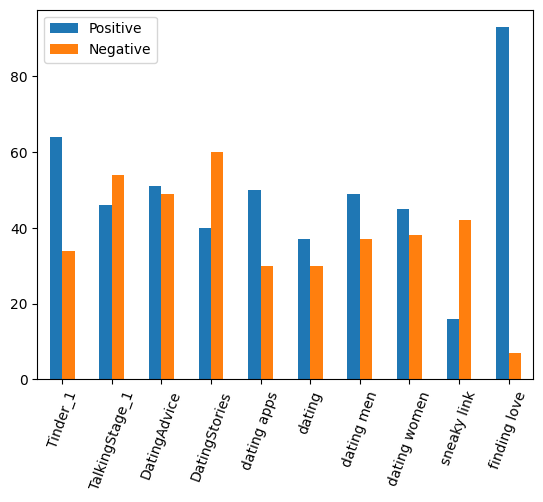

In [231]:
#Tinder_1	64 	34,   TalkingStage_1 	46	 54, Testing	20	40,
# 18_May_DatingAdvice	51	49, 18_May_DatingStories	40	60
#24_April_TRP_tweets	31	69
#vader sentiement results
pos = [64, 46, 51, 40,50,37,49,45,16,93]
neg = [34, 54, 49,60,30,30,37,38,42,7]
index = ['Tinder_1', 'TalkingStage_1', 'DatingAdvice',
         'DatingStories','dating apps','dating','dating men','dating women','sneaky link',
         'finding love']
df = pd.DataFrame({'Positive': pos,
                   'Negative': neg}, index=index)
ax = df.plot.bar(rot=70)

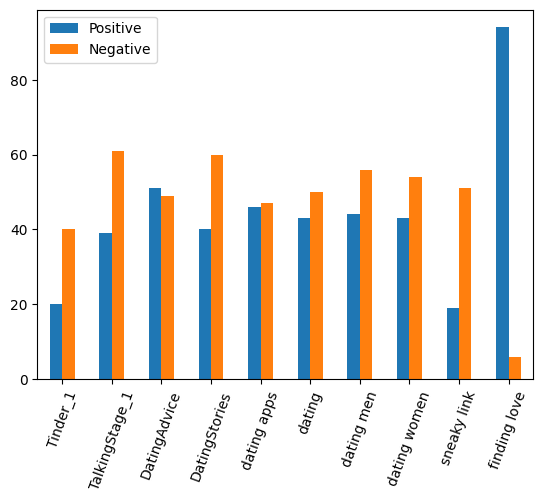

In [20]:
#nltk sentiement results
pos = [20, 39, 51, 40,46,43,44,43,19,94]
neg = [40, 61, 49,60,47,50,56,54,51,6]
index = ['Tinder_1', 'TalkingStage_1', 'DatingAdvice',
         'DatingStories','dating apps','dating','dating men','dating women','sneaky link',
         'finding love']
df = pd.DataFrame({'Positive': pos,
                   'Negative': neg}, index=index)
ax = df.plot.bar(rot=70)

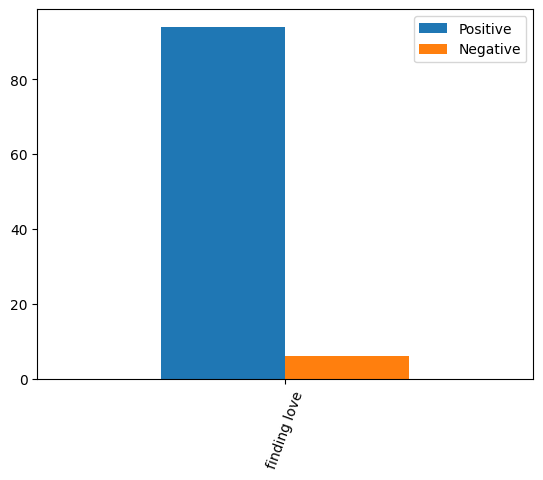

In [3]:
#nltk sentiement results
pos = [94]
neg = [6]
index = ['finding love']
df = pd.DataFrame({'Positive': pos,
                   'Negative': neg}, index=index)
ax = df.plot.bar(rot=70)

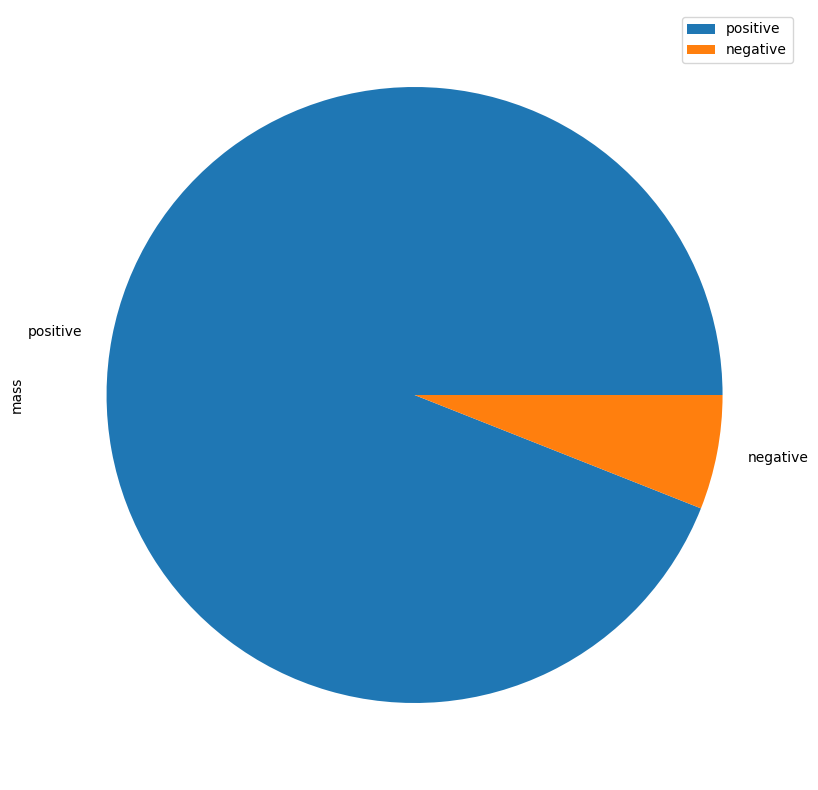

In [12]:
#manipulating radius doesnt affect chart
#calc for pie chart. 94 positive and 6 negative. 
# 94 // 100 = 0.94     &      6 // 100 = 0.06
# 0.94 * 360 = 338.4.       &    6 * 360 = 21.6 
#do calc in code 
df = pd.DataFrame({'mass': [0.94, 0.06],
                   'radius': [23.7, 1.8]},
                  index=['positive', 'negative'])
plot = df.plot.pie(y='mass', figsize=(10, 10))